In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup as bs
import os
import datetime
from datetime import datetime as dt
from scipy import stats
import seaborn as sns
from tqdm import tqdm
import pickle
import time
import math
from google.colab import output
import cv2
import requests
pd.set_option('display.max_rows',None)


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Code/Investment_Analysis/Chinese_Stock_CSV.csv")
symbols = df["Symbol"]
with open ("Chinese_stock_symbol.txt", "wb") as f:
    f.write(pickle.dumps(symbols))


In [ ]:
def get_dataframe(stock, anaysis_period = 3650*2):
    # A huge epoch that allows most up to date info
    current_epoch = 3000000000
    past_epoch = int((dt.now() - datetime.timedelta(anaysis_period)).timestamp())
    url = f"https://query1.finance.yahoo.com/v7/finance/download/{stock}?period1={past_epoch}&period2={current_epoch}&interval=1d&events=history&includeAdjustedClose=true"
    df = pd.read_csv(url)
    return df

def update_stock_df():
    change_df = pd.DataFrame(columns = ["stock", "change"])
    REPORT_PERIOD = 1
    total_change = 0
    total_stock = 0

    labels = [i/10000 for i in range(1000, -1, -50)]
    brightnesses = [i for i in range(255, 34, -11)]

    stock_df = {}
    color_list = []

    initialized = False
    i = 1

    for symbol in tqdm(symbols):
        start = time.time()

        try:
            df = get_dataframe(symbol)
            stock_df[symbol] = df

            change = ((df.Close - df.shift(REPORT_PERIOD).Close) / df.shift(REPORT_PERIOD).Close).to_list()[-1]
            idx = 0
            while abs(change) < labels[idx]:
                idx += 1
            brightness = brightnesses[idx]
            if change > 0:
                color = (0, brightness, 0)
            else:
                color = (brightness, 0, 0)

            color_list.append(color)
            color_matrix = []

            color_list = sorted(color_list)

            DIMENSION = int(len(color_list)**(1/2))

            for i in range(DIMENSION):
                color_matrix.append(color_list[i*DIMENSION:(i+1)*DIMENSION])


            if len(color_list) > DIMENSION * DIMENSION:
                a = color_list[DIMENSION * DIMENSION:]
                while len(a) > DIMENSION:
                    color_matrix.append(a[:DIMENSION])
                    a = a[DIMENSION:]
                while len(a) < DIMENSION:
                    a.append((255,255,255))

                color_matrix.append(a)

            plt.clf()
            plt.imshow(color_matrix)
            plt.savefig(f"{i}.png")
            plt.show()

            img = cv2.imread(f"{i}.png")
            height, width, layers = img.shape
            size = (width,height)

            if not initialized:
                out = cv2.VideoWriter(f"output.mp4",cv2.VideoWriter_fourcc(*'DIVX'), 1, size)
                initialized = True


            i += 1
            out.write(img)

            change_df = change_df.append({"stock":symbol, "change":change}, ignore_index=True)
            total_change += change
            total_stock += 1
            print("average change:", round(total_change/total_stock,6)*100, "%")




        except Exception as e:
            print(e)

        while time.time() - start < 1:
            pass

    with open("/content/drive/MyDrive/Investment_Analysis/chinese_stock_df.txt", "wb") as f:
        f.write(pickle.dumps(stock_df))
    out.release()

    return change_df

  0%|          | 0/254 [00:00<?, ?it/s]

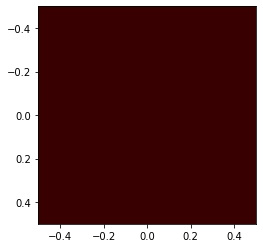

average change: -1.1632 %


  0%|          | 1/254 [00:01<04:13,  1.00s/it]

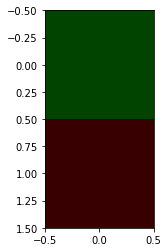

average change: 0.4149 %


  1%|          | 2/254 [00:02<04:12,  1.00s/it]

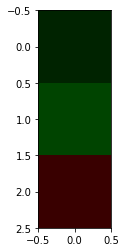

average change: 0.407 %


  1%|          | 3/254 [00:03<04:11,  1.00s/it]

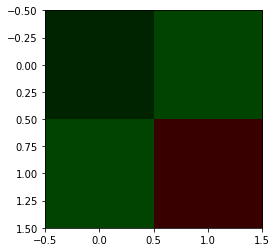

average change: 0.7927 %


  2%|▏         | 4/254 [00:04<04:10,  1.00s/it]

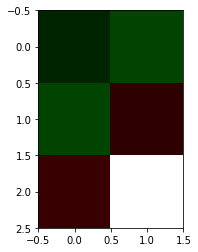

average change: 0.5075999999999999 %


  2%|▏         | 5/254 [00:05<04:09,  1.00s/it]

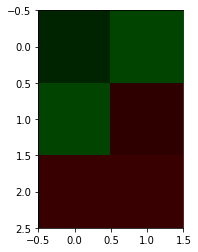

average change: 0.2012 %


  2%|▏         | 6/254 [00:06<04:08,  1.00s/it]

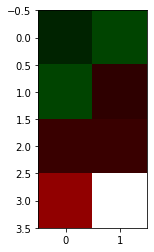

average change: -0.5950000000000001 %


  3%|▎         | 7/254 [00:07<04:07,  1.00s/it]

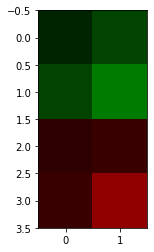

average change: 0.0044 %


  3%|▎         | 8/254 [00:08<04:06,  1.00s/it]

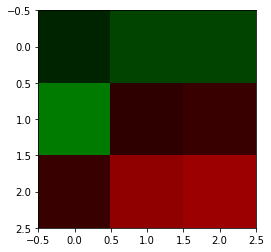

average change: -0.6204999999999999 %


  4%|▎         | 9/254 [00:09<04:05,  1.00s/it]

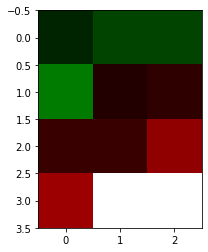

average change: -0.5807 %


  4%|▍         | 10/254 [00:10<04:04,  1.00s/it]

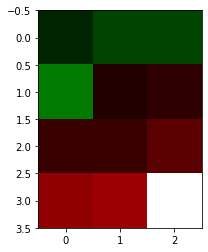

average change: -0.7658 %


  4%|▍         | 11/254 [00:11<04:03,  1.00s/it]

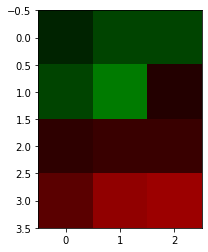

average change: -0.5542 %


  5%|▍         | 12/254 [00:12<04:02,  1.00s/it]

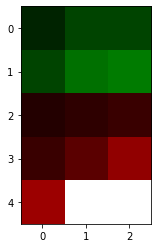

average change: -0.2053 %


  5%|▌         | 13/254 [00:13<04:01,  1.00s/it]

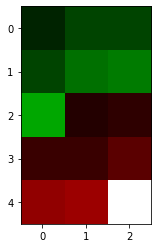

average change: 0.2646 %


  6%|▌         | 14/254 [00:14<04:00,  1.00s/it]

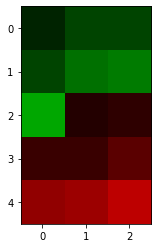

average change: -0.22999999999999998 %


  6%|▌         | 15/254 [00:15<03:59,  1.00s/it]

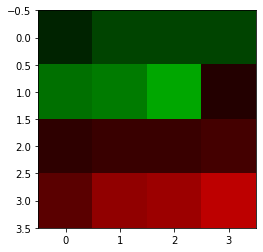

average change: -0.332 %


  6%|▋         | 16/254 [00:16<03:58,  1.00s/it]

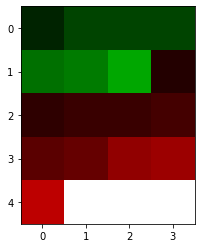

average change: -0.4952 %


  7%|▋         | 17/254 [00:17<03:57,  1.00s/it]

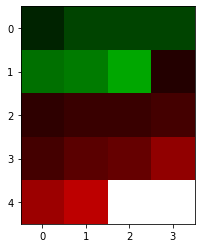

average change: -0.5695 %


  7%|▋         | 18/254 [00:18<03:56,  1.00s/it]

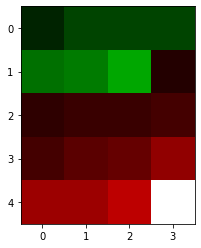

average change: -0.8487 %


  7%|▋         | 19/254 [00:19<03:55,  1.00s/it]

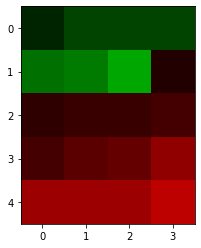

average change: -1.1042 %


  8%|▊         | 20/254 [00:20<03:54,  1.00s/it]

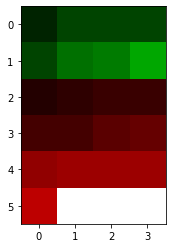

average change: -0.9599 %


  8%|▊         | 21/254 [00:21<03:53,  1.00s/it]

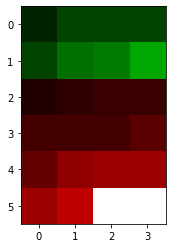

average change: -0.9977 %


  9%|▊         | 22/254 [00:22<03:52,  1.00s/it]

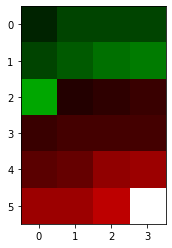

average change: -0.839 %


  9%|▉         | 23/254 [00:23<03:51,  1.00s/it]

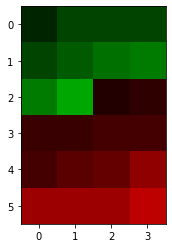

average change: -0.6254 %


  9%|▉         | 24/254 [00:24<03:50,  1.00s/it]

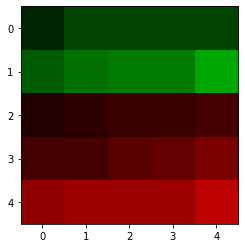

average change: -0.7625 %


 10%|▉         | 25/254 [00:25<03:49,  1.00s/it]

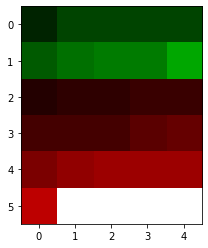

average change: -0.7654 %


 10%|█         | 26/254 [00:26<03:48,  1.00s/it]

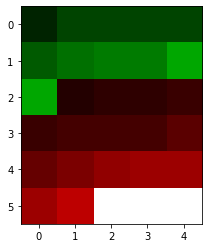

average change: -0.503 %


 11%|█         | 27/254 [00:27<03:47,  1.00s/it]

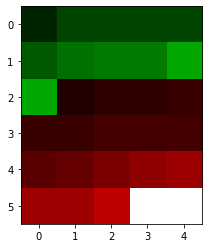

average change: -0.5305 %


 11%|█         | 28/254 [00:28<03:46,  1.00s/it]

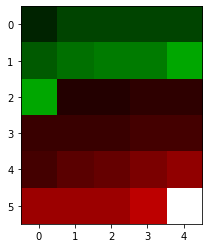

average change: -0.5237999999999999 %


 11%|█▏        | 29/254 [00:29<03:45,  1.00s/it]

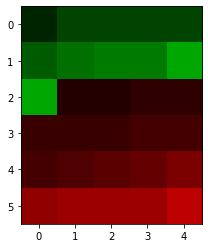

average change: -0.579 %


 12%|█▏        | 30/254 [00:30<03:44,  1.00s/it]

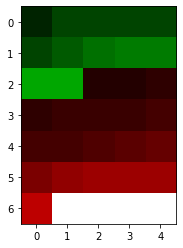

average change: -0.5077 %


 12%|█▏        | 31/254 [00:31<03:43,  1.00s/it]

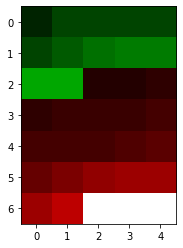

average change: -0.5533 %


 13%|█▎        | 32/254 [00:32<03:42,  1.00s/it]

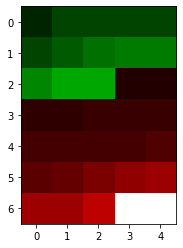

average change: -0.3872 %


 13%|█▎        | 33/254 [00:33<03:41,  1.00s/it]

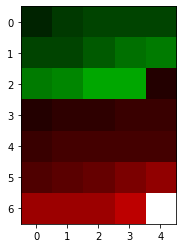

average change: -0.3366 %


 13%|█▎        | 34/254 [00:34<03:40,  1.00s/it]

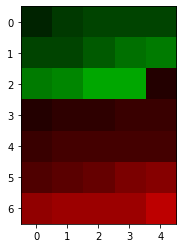

average change: -0.4652 %


 14%|█▍        | 35/254 [00:35<03:39,  1.00s/it]

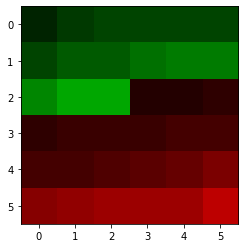

average change: -0.3808 %


 14%|█▍        | 36/254 [00:36<03:38,  1.00s/it]

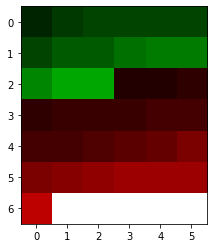

average change: -0.4878 %


 15%|█▍        | 37/254 [00:37<03:37,  1.00s/it]

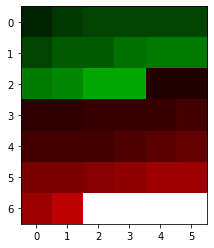

average change: -0.368 %


 15%|█▍        | 38/254 [00:38<03:36,  1.00s/it]

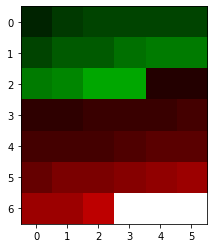

average change: -0.4351 %


 15%|█▌        | 39/254 [00:39<03:35,  1.00s/it]

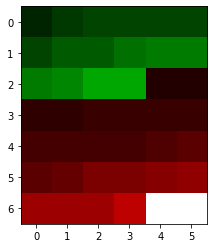

average change: -0.45690000000000003 %


 16%|█▌        | 40/254 [00:40<03:34,  1.00s/it]

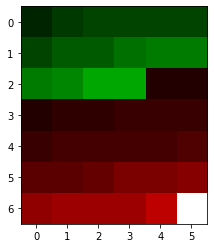

average change: -0.4579 %


 16%|█▌        | 41/254 [00:41<03:33,  1.00s/it]

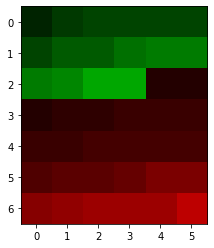

average change: -0.47730000000000006 %


 17%|█▋        | 42/254 [00:42<03:32,  1.00s/it]

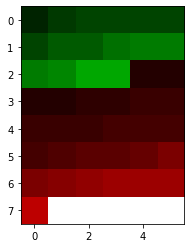

average change: -0.4755 %


 17%|█▋        | 43/254 [00:43<03:31,  1.00s/it]

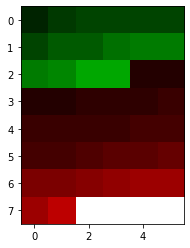

average change: -0.4767 %


 17%|█▋        | 44/254 [00:44<03:30,  1.00s/it]

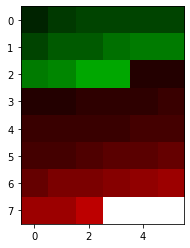

average change: -0.5417 %


 18%|█▊        | 45/254 [00:45<03:29,  1.00s/it]

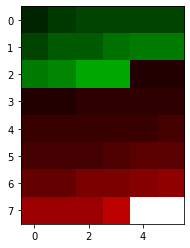

average change: -0.544 %


 18%|█▊        | 46/254 [00:46<03:28,  1.00s/it]

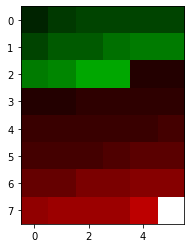

average change: -0.6356999999999999 %


 19%|█▊        | 47/254 [00:47<03:27,  1.00s/it]

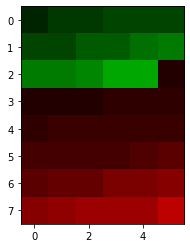

average change: -0.5912999999999999 %


 19%|█▉        | 48/254 [00:48<03:26,  1.00s/it]

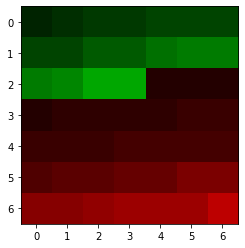

average change: -0.5624 %


 19%|█▉        | 49/254 [00:49<03:26,  1.01s/it]

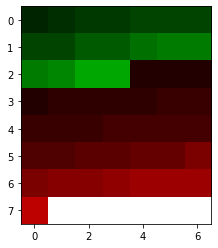

average change: -0.5968 %


 20%|█▉        | 50/254 [00:50<03:24,  1.00s/it]

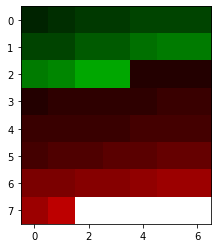

average change: -0.6106999999999999 %


 20%|██        | 51/254 [00:51<03:23,  1.00s/it]

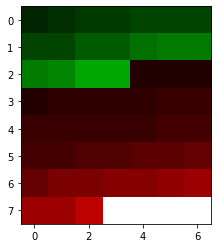

average change: -0.6194 %


 20%|██        | 52/254 [00:52<03:22,  1.00s/it]

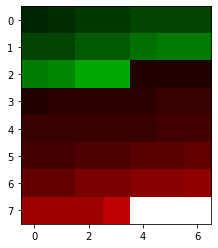

average change: -0.6684 %


 21%|██        | 53/254 [00:53<03:21,  1.00s/it]

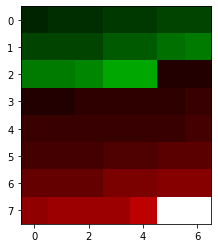

average change: -0.6457 %


 21%|██▏       | 54/254 [00:54<03:20,  1.00s/it]

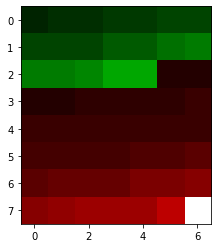

average change: -0.66 %


 22%|██▏       | 55/254 [00:55<03:19,  1.00s/it]

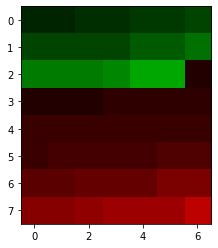

average change: -0.6466000000000001 %


 22%|██▏       | 56/254 [00:56<03:18,  1.00s/it]

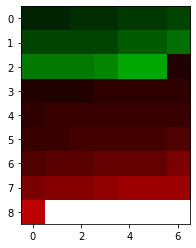

average change: -0.6505000000000001 %


 22%|██▏       | 57/254 [00:57<03:17,  1.00s/it]

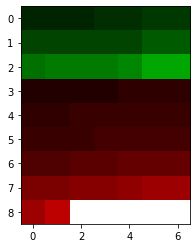

average change: -0.6376999999999999 %


 23%|██▎       | 58/254 [00:58<03:16,  1.00s/it]

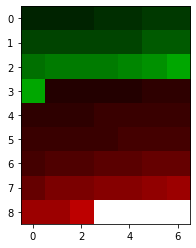

average change: -0.5416 %


 23%|██▎       | 59/254 [00:59<03:15,  1.00s/it]

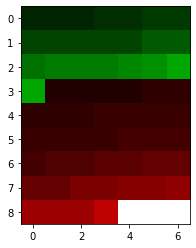

average change: -0.5842 %


 24%|██▎       | 60/254 [01:00<03:14,  1.00s/it]

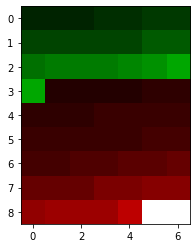

average change: -0.5948 %


 24%|██▍       | 61/254 [01:01<03:13,  1.00s/it]

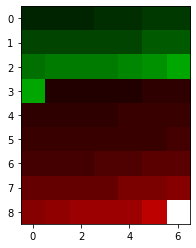

average change: -0.5956 %


 24%|██▍       | 62/254 [01:02<03:12,  1.00s/it]

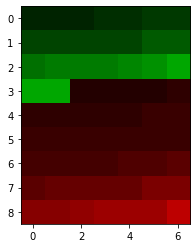

average change: -0.48910000000000003 %


 25%|██▍       | 63/254 [01:03<03:11,  1.00s/it]

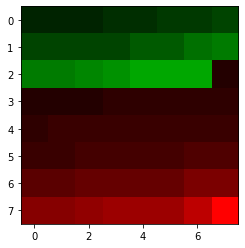

average change: -0.6777 %


 25%|██▌       | 64/254 [01:04<03:10,  1.00s/it]

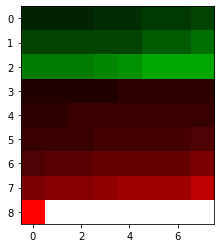

average change: -0.643 %


 26%|██▌       | 65/254 [01:05<03:09,  1.00s/it]

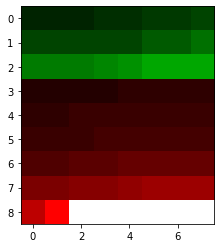

average change: -0.6596000000000001 %


 26%|██▌       | 66/254 [01:06<03:08,  1.00s/it]

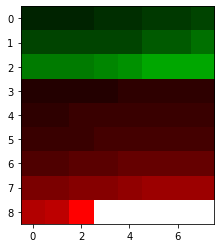

average change: -0.7474 %


 26%|██▋       | 67/254 [01:07<03:07,  1.00s/it]

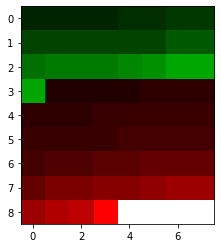

average change: -0.7301 %


 27%|██▋       | 68/254 [01:08<03:06,  1.00s/it]

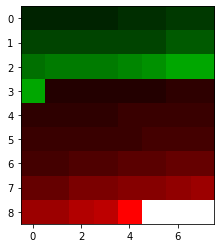

average change: -0.7226 %


 27%|██▋       | 69/254 [01:09<03:05,  1.00s/it]

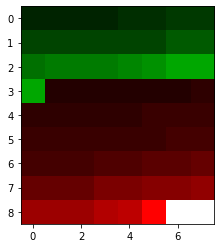

average change: -0.7135 %


 28%|██▊       | 70/254 [01:10<03:04,  1.00s/it]

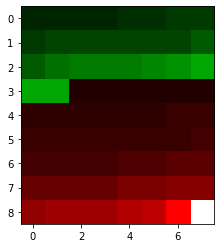

average change: -0.687 %


 28%|██▊       | 71/254 [01:11<03:03,  1.00s/it]

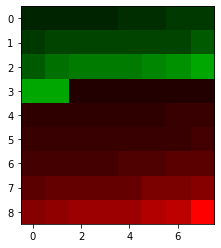

average change: -0.7165 %


 28%|██▊       | 72/254 [01:12<03:02,  1.00s/it]

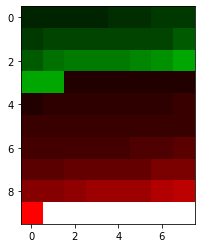

average change: -0.7126 %


 29%|██▊       | 73/254 [01:13<03:01,  1.00s/it]

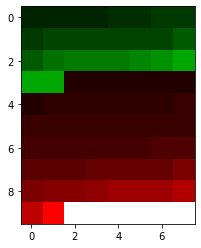

average change: -0.7248 %


 29%|██▉       | 74/254 [01:14<03:00,  1.00s/it]

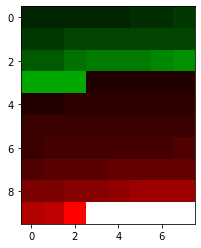

average change: -0.7089 %


 30%|██▉       | 75/254 [01:15<02:59,  1.00s/it]

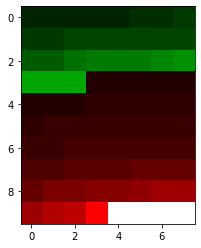

average change: -0.6996 %


 30%|██▉       | 76/254 [01:16<02:58,  1.00s/it]

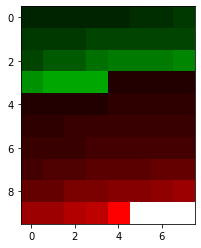

average change: -0.674 %


 30%|███       | 77/254 [01:17<02:57,  1.00s/it]

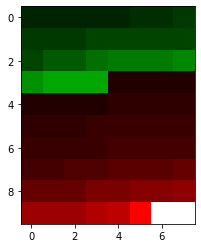

average change: -0.6743 %


 31%|███       | 78/254 [01:18<02:56,  1.00s/it]

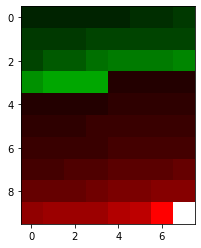

average change: -0.7144 %


 31%|███       | 79/254 [01:19<02:55,  1.00s/it]

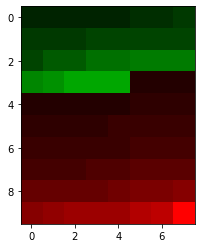

average change: -0.6602 %


 31%|███▏      | 80/254 [01:20<02:54,  1.00s/it]

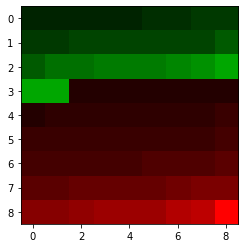

average change: -0.681 %


 32%|███▏      | 81/254 [01:21<02:53,  1.00s/it]

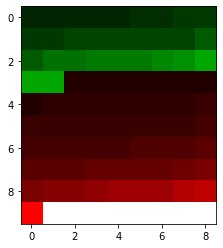

average change: -0.7045 %


 32%|███▏      | 82/254 [01:22<02:52,  1.00s/it]

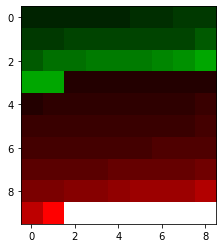

average change: -0.7187 %


 33%|███▎      | 83/254 [01:23<02:51,  1.01s/it]

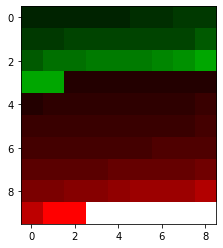

average change: -0.8340000000000001 %


 33%|███▎      | 84/254 [01:24<02:50,  1.01s/it]

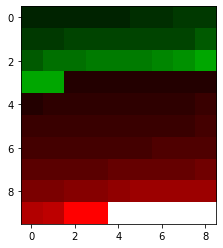

average change: -0.8892000000000001 %


 33%|███▎      | 85/254 [01:25<02:49,  1.01s/it]

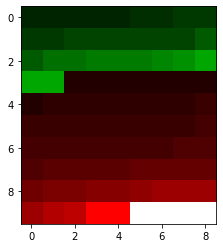

average change: -0.8996999999999999 %


 34%|███▍      | 86/254 [01:26<02:49,  1.01s/it]

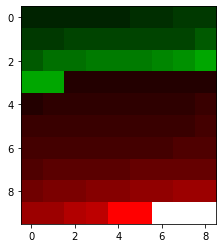

average change: -0.9480999999999999 %


 34%|███▍      | 87/254 [01:27<02:47,  1.00s/it]

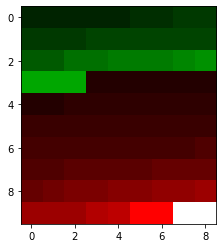

average change: -0.9236 %


 35%|███▍      | 88/254 [01:28<02:46,  1.00s/it]

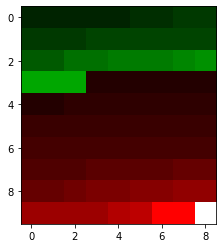

average change: -0.9301 %


 35%|███▌      | 89/254 [01:29<02:45,  1.00s/it]

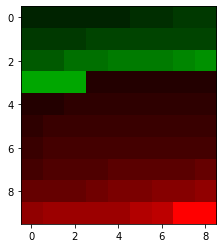

average change: -0.9258000000000001 %


 35%|███▌      | 90/254 [01:30<02:44,  1.00s/it]

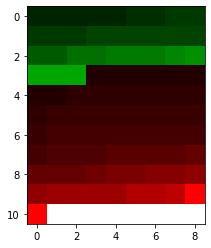

average change: -0.9898 %


 36%|███▌      | 91/254 [01:31<02:43,  1.00s/it]

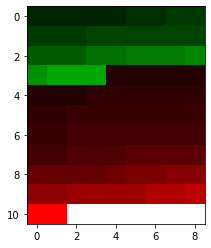

average change: -0.9497 %


 36%|███▌      | 92/254 [01:32<02:42,  1.00s/it]

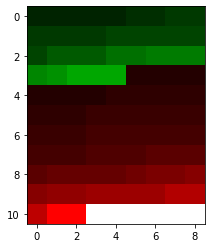

average change: -0.9259 %


 37%|███▋      | 93/254 [01:33<02:41,  1.00s/it]

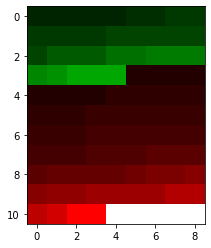

average change: -1.004 %


 37%|███▋      | 94/254 [01:34<02:40,  1.00s/it]

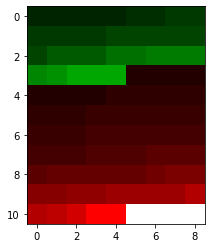

average change: -1.0290000000000001 %


 37%|███▋      | 95/254 [01:35<02:39,  1.00s/it]

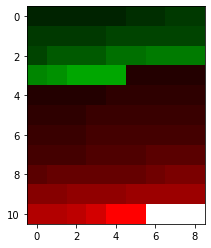

average change: -1.0723 %


 38%|███▊      | 96/254 [01:36<02:38,  1.00s/it]

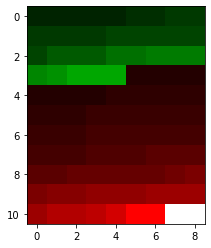

average change: -1.0897999999999999 %


 38%|███▊      | 97/254 [01:37<02:37,  1.00s/it]

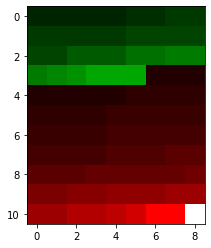

average change: -1.0671 %


 39%|███▊      | 98/254 [01:38<02:36,  1.00s/it]

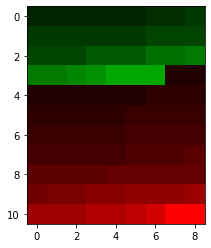

average change: -1.0524 %


 39%|███▉      | 99/254 [01:39<02:35,  1.00s/it]

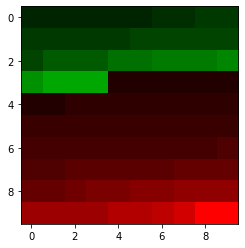

average change: -1.0527 %


 39%|███▉      | 100/254 [01:40<02:34,  1.00s/it]

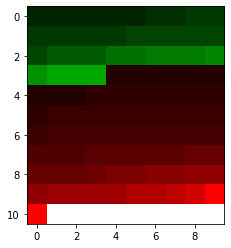

average change: -1.0422 %


 40%|███▉      | 101/254 [01:41<02:33,  1.00s/it]

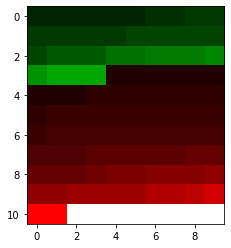

average change: -1.0766 %


 40%|████      | 102/254 [01:42<02:32,  1.00s/it]

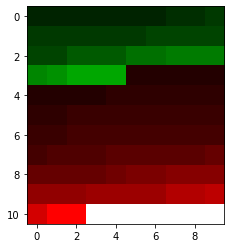

average change: -1.0652 %


 41%|████      | 103/254 [01:43<02:31,  1.00s/it]

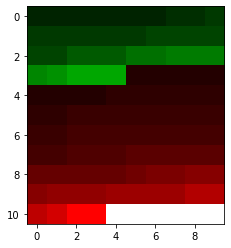

average change: -1.072 %


 41%|████      | 104/254 [01:44<02:30,  1.00s/it]

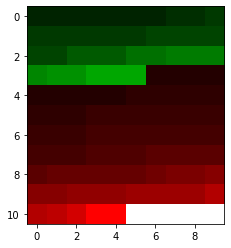

average change: -1.0115 %


 41%|████▏     | 105/254 [01:45<02:29,  1.00s/it]

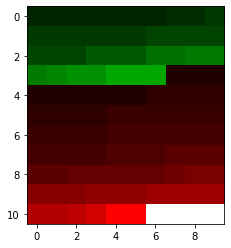

average change: -0.9865 %


 42%|████▏     | 106/254 [01:46<02:28,  1.00s/it]

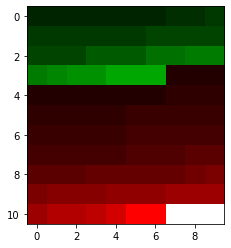

average change: -0.9773000000000001 %


 42%|████▏     | 107/254 [01:47<02:27,  1.00s/it]

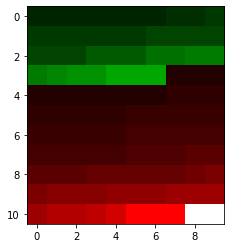

average change: -1.7262 %


 43%|████▎     | 108/254 [01:48<02:26,  1.00s/it]

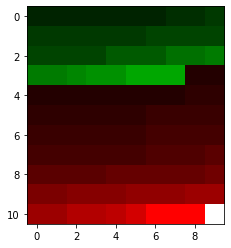

average change: -1.6925 %


 43%|████▎     | 109/254 [01:49<02:25,  1.00s/it]

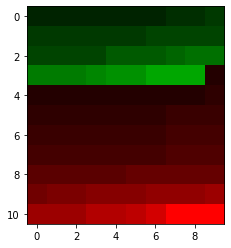

average change: -1.6477 %


 43%|████▎     | 110/254 [01:50<02:24,  1.00s/it]

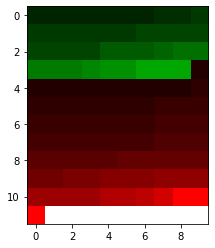

average change: -1.6646999999999998 %


 44%|████▎     | 111/254 [01:51<02:23,  1.00s/it]

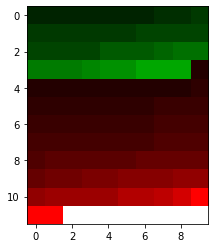

average change: -1.6687 %


 44%|████▍     | 112/254 [01:52<02:22,  1.00s/it]

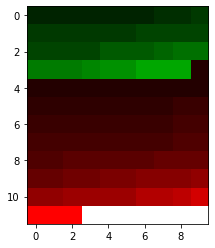

average change: -1.654 %


 44%|████▍     | 113/254 [01:53<02:21,  1.00s/it]

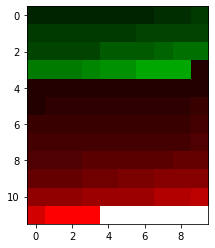

average change: -1.6403999999999999 %


 45%|████▍     | 114/254 [01:54<02:20,  1.00s/it]

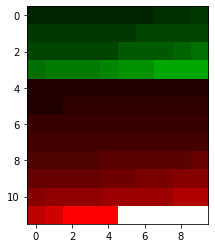

average change: -1.6091000000000002 %


 45%|████▌     | 115/254 [01:55<02:19,  1.00s/it]

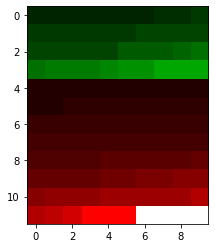

average change: -1.6466 %


 46%|████▌     | 116/254 [01:56<02:18,  1.00s/it]

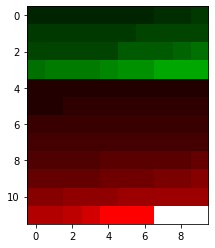

average change: -1.6636000000000002 %


 46%|████▌     | 117/254 [01:57<02:17,  1.00s/it]

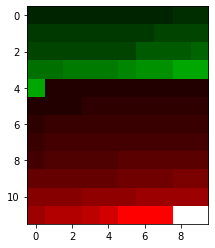

average change: -1.6479000000000001 %


 46%|████▋     | 118/254 [01:58<02:16,  1.00s/it]

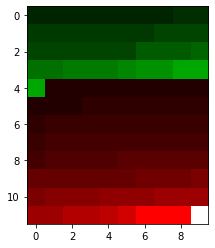

average change: -1.6608999999999998 %


 47%|████▋     | 119/254 [01:59<02:15,  1.00s/it]

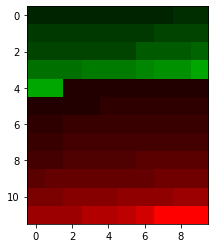

average change: -1.6142 %


 47%|████▋     | 120/254 [02:00<02:14,  1.00s/it]

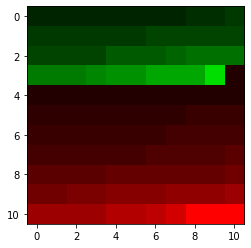

average change: -1.5288 %


 48%|████▊     | 121/254 [02:01<02:13,  1.00s/it]

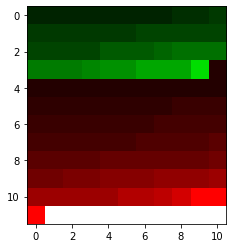

average change: -1.5622 %


 48%|████▊     | 122/254 [02:02<02:12,  1.00s/it]

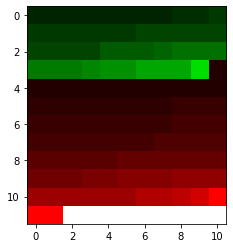

average change: -1.5582 %


 48%|████▊     | 123/254 [02:03<02:11,  1.00s/it]

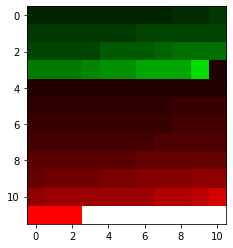

average change: -1.5673 %


 49%|████▉     | 124/254 [02:04<02:10,  1.00s/it]

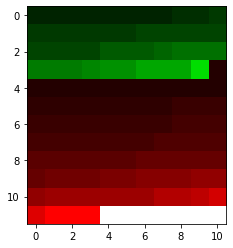

average change: -1.6246 %


 49%|████▉     | 125/254 [02:05<02:09,  1.00s/it]

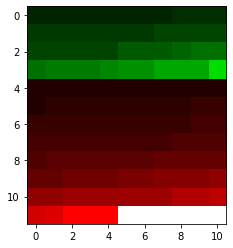

average change: -1.6049 %


 50%|████▉     | 126/254 [02:06<02:08,  1.00s/it]

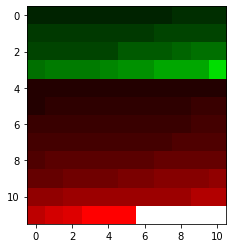

average change: -1.6376000000000002 %


 50%|█████     | 127/254 [02:07<02:07,  1.00s/it]

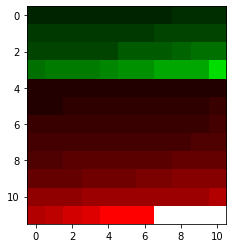

average change: -1.6247999999999998 %


 50%|█████     | 128/254 [02:08<02:06,  1.00s/it]

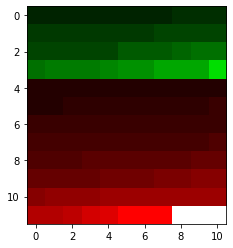

average change: -1.6204 %


 51%|█████     | 129/254 [02:09<02:05,  1.00s/it]

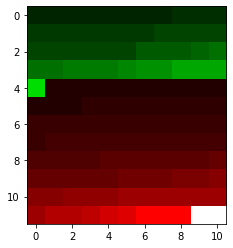

average change: -1.593 %


 51%|█████     | 130/254 [02:10<02:04,  1.00s/it]

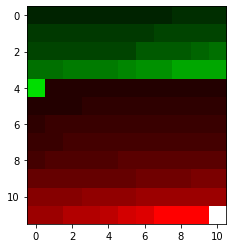

average change: -1.5879 %


 52%|█████▏    | 131/254 [02:11<02:03,  1.00s/it]

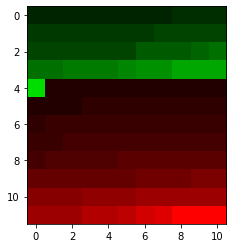

average change: -1.6204 %


 52%|█████▏    | 132/254 [02:12<02:02,  1.00s/it]

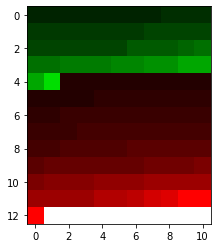

average change: -1.5723999999999998 %


 52%|█████▏    | 133/254 [02:13<02:01,  1.00s/it]

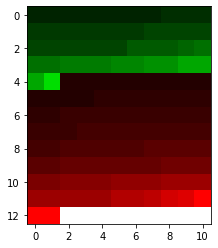

average change: -1.5784 %


 53%|█████▎    | 134/254 [02:14<02:00,  1.00s/it]

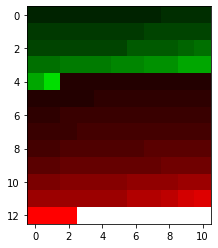

average change: -1.6018999999999999 %


 53%|█████▎    | 135/254 [02:15<01:59,  1.00s/it]

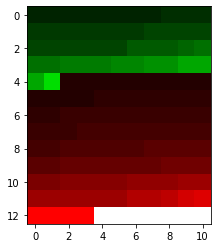

average change: -1.6662 %


 54%|█████▎    | 136/254 [02:16<01:58,  1.00s/it]

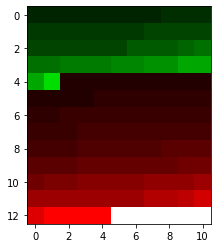

average change: -1.6653000000000002 %


 54%|█████▍    | 137/254 [02:17<01:57,  1.00s/it]

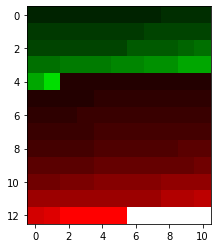

average change: -1.6589 %


 54%|█████▍    | 138/254 [02:18<01:56,  1.00s/it]

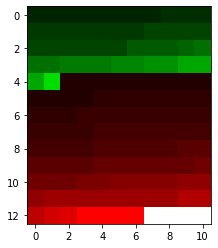

average change: -1.6722000000000001 %


 55%|█████▍    | 139/254 [02:19<01:55,  1.00s/it]

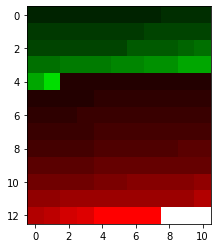

average change: -1.6838 %


 55%|█████▌    | 140/254 [02:20<01:54,  1.00s/it]

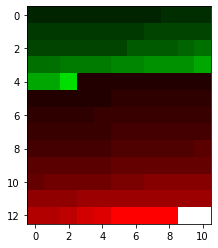

average change: -1.6364 %


 56%|█████▌    | 141/254 [02:21<01:53,  1.00s/it]

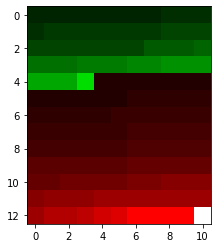

average change: -1.6188 %


 56%|█████▌    | 142/254 [02:22<01:52,  1.00s/it]

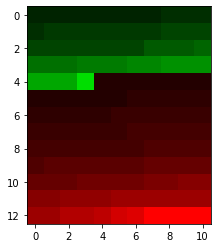

average change: -1.6185 %


 56%|█████▋    | 143/254 [02:23<01:51,  1.00s/it]

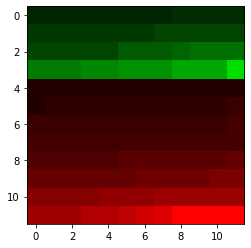

average change: -1.6204 %


 57%|█████▋    | 144/254 [02:24<01:50,  1.00s/it]

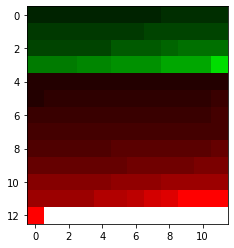

average change: -1.6436 %


 57%|█████▋    | 145/254 [02:25<01:49,  1.00s/it]

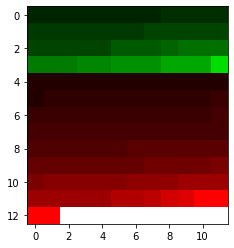

average change: -1.6469 %


 57%|█████▋    | 146/254 [02:26<01:48,  1.00s/it]

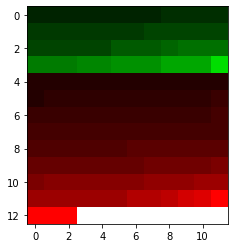

average change: -1.6664999999999999 %


 58%|█████▊    | 147/254 [02:27<01:47,  1.00s/it]

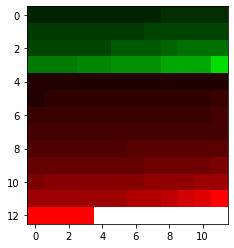

average change: -1.7303 %


 58%|█████▊    | 148/254 [02:28<01:46,  1.00s/it]

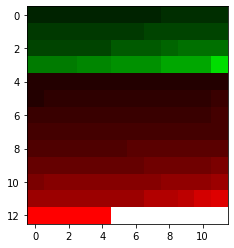

average change: -1.7502 %


 59%|█████▊    | 149/254 [02:29<01:45,  1.00s/it]

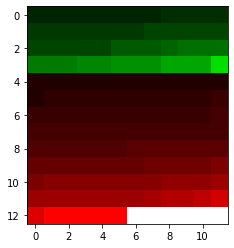

average change: -1.7811000000000001 %


 59%|█████▉    | 150/254 [02:30<01:44,  1.00s/it]

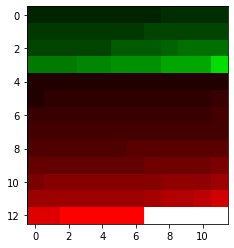

average change: -1.8260999999999998 %


 59%|█████▉    | 151/254 [02:31<01:43,  1.00s/it]

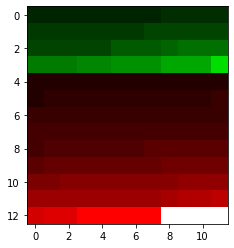

average change: -1.8232000000000002 %


 60%|█████▉    | 152/254 [02:32<01:42,  1.00s/it]

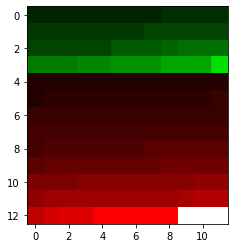

average change: -1.8384 %


 60%|██████    | 153/254 [02:33<01:41,  1.00s/it]

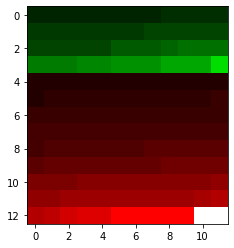

average change: -1.8574 %


 61%|██████    | 154/254 [02:34<01:40,  1.00s/it]

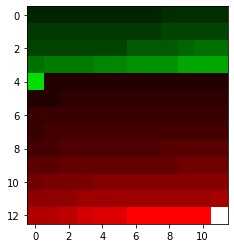

average change: -1.8369 %


 61%|██████    | 155/254 [02:35<01:39,  1.00s/it]

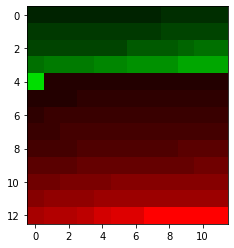

average change: -1.8263000000000003 %


 61%|██████▏   | 156/254 [02:36<01:38,  1.00s/it]

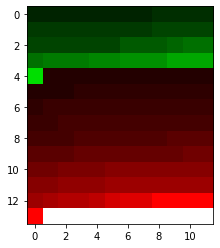

average change: -1.8434 %


 62%|██████▏   | 157/254 [02:37<01:37,  1.00s/it]

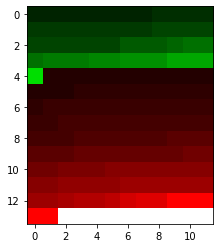

average change: -1.8646 %


 62%|██████▏   | 158/254 [02:38<01:36,  1.00s/it]

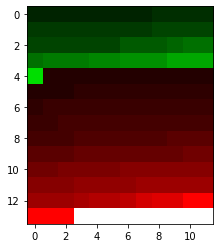

average change: -1.8788 %


 63%|██████▎   | 159/254 [02:39<01:35,  1.00s/it]

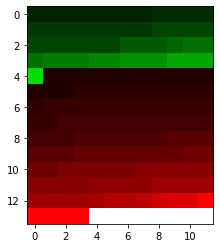

average change: -1.8925 %


 63%|██████▎   | 160/254 [02:40<01:34,  1.00s/it]

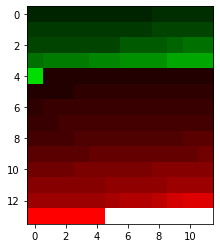

average change: -1.8960000000000001 %


 63%|██████▎   | 161/254 [02:41<01:33,  1.00s/it]

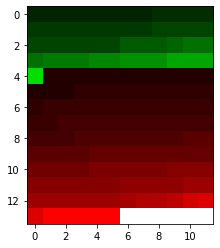

average change: -1.905 %


 64%|██████▍   | 162/254 [02:42<01:32,  1.00s/it]

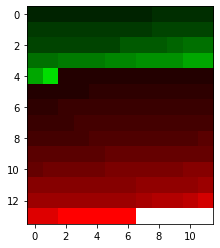

average change: -1.8716 %


 64%|██████▍   | 163/254 [02:43<01:31,  1.00s/it]

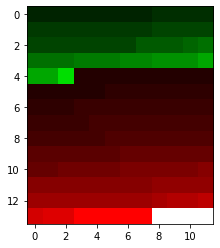

average change: -1.848 %


 65%|██████▍   | 164/254 [02:44<01:30,  1.00s/it]

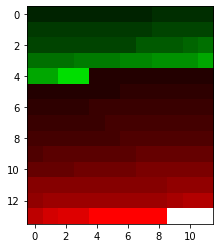

average change: -1.7846999999999997 %


 65%|██████▍   | 165/254 [02:45<01:29,  1.00s/it]

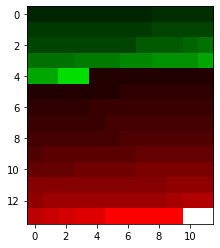

average change: -1.8218 %


 65%|██████▌   | 166/254 [02:46<01:28,  1.00s/it]

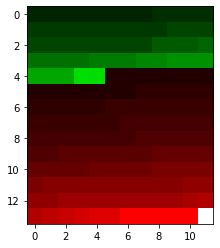

average change: -1.8029 %


 66%|██████▌   | 167/254 [02:47<01:27,  1.00s/it]

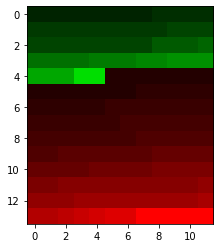

average change: -1.8162999999999998 %


 66%|██████▌   | 168/254 [02:48<01:26,  1.00s/it]

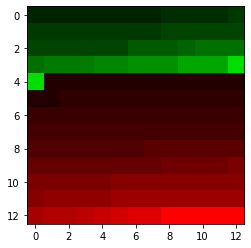

average change: -1.8107000000000002 %


 67%|██████▋   | 169/254 [02:49<01:25,  1.00s/it]

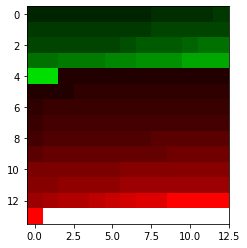

average change: -1.7860999999999998 %


 67%|██████▋   | 170/254 [02:50<01:24,  1.00s/it]

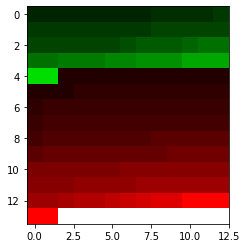

average change: -1.8026 %


 67%|██████▋   | 171/254 [02:51<01:23,  1.00s/it]

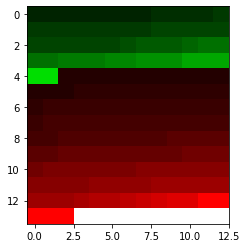

average change: -1.8032 %


 68%|██████▊   | 172/254 [02:52<01:22,  1.00s/it]

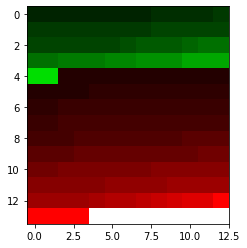

average change: -1.7928 %


 68%|██████▊   | 173/254 [02:53<01:21,  1.00s/it]

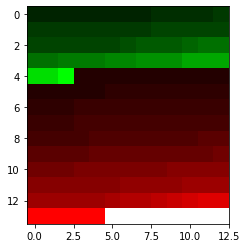

average change: -1.7242 %


 69%|██████▊   | 174/254 [02:54<01:20,  1.00s/it]

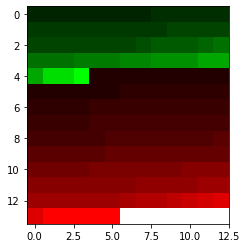

average change: -1.7102 %


 69%|██████▉   | 175/254 [02:55<01:19,  1.00s/it]

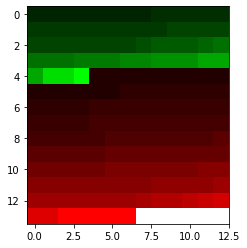

average change: -1.7217 %


 69%|██████▉   | 176/254 [02:56<01:18,  1.00s/it]

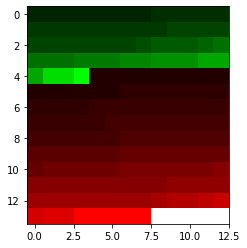

average change: -1.7203 %


 70%|██████▉   | 177/254 [02:57<01:17,  1.00s/it]

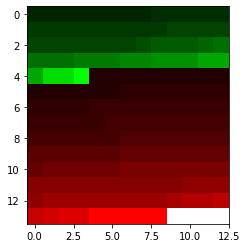

average change: -1.7333999999999998 %


 70%|███████   | 178/254 [02:58<01:16,  1.00s/it]

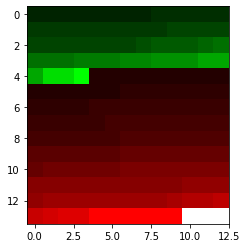

average change: -1.9085 %


 70%|███████   | 179/254 [02:59<01:15,  1.00s/it]

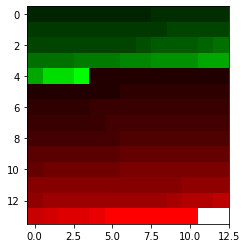

average change: -1.9487999999999999 %


 71%|███████   | 180/254 [03:00<01:14,  1.00s/it]

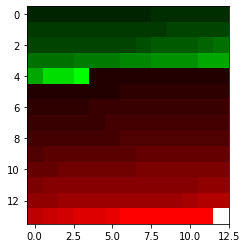

average change: -1.9515 %


 71%|███████▏  | 181/254 [03:01<01:13,  1.00s/it]

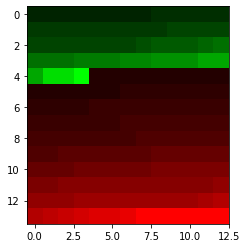

average change: -1.9487 %


 72%|███████▏  | 182/254 [03:02<01:12,  1.00s/it]

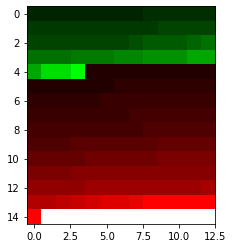

average change: -1.942 %


 72%|███████▏  | 183/254 [03:03<01:11,  1.00s/it]

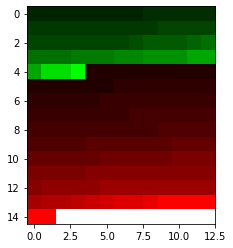

average change: -1.9398 %


 72%|███████▏  | 184/254 [03:04<01:10,  1.00s/it]

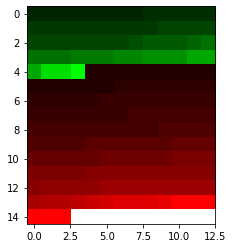

average change: -1.9761000000000002 %


 73%|███████▎  | 185/254 [03:05<01:09,  1.00s/it]

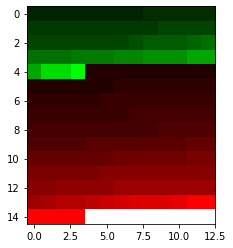

average change: -1.9807000000000001 %


 73%|███████▎  | 186/254 [03:06<01:08,  1.00s/it]

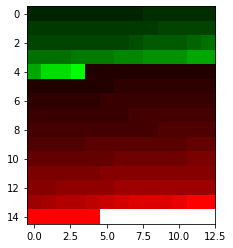

average change: -2.0613 %


 74%|███████▎  | 187/254 [03:07<01:07,  1.00s/it]

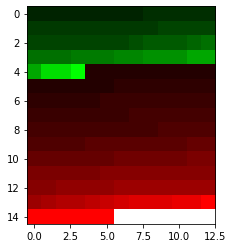

average change: -2.0992 %


 74%|███████▍  | 188/254 [03:08<01:06,  1.00s/it]

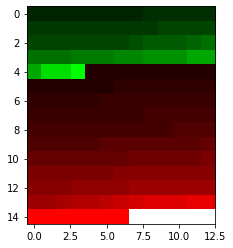

average change: -2.0934999999999997 %


 74%|███████▍  | 189/254 [03:09<01:05,  1.00s/it]

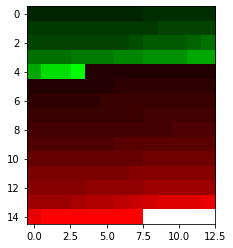

average change: -2.0931 %


 75%|███████▍  | 190/254 [03:10<01:04,  1.00s/it]

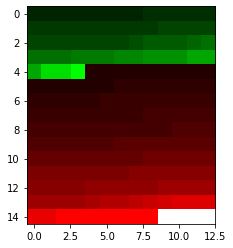

average change: -2.1097 %


 75%|███████▌  | 191/254 [03:11<01:03,  1.00s/it]

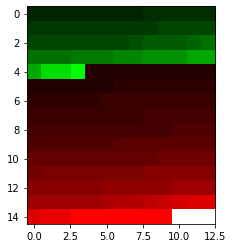

average change: -2.1149999999999998 %


 76%|███████▌  | 192/254 [03:12<01:02,  1.00s/it]

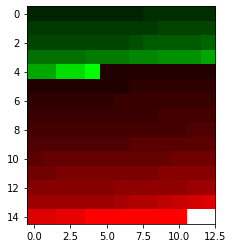

average change: -2.0887 %


 76%|███████▌  | 193/254 [03:13<01:01,  1.00s/it]

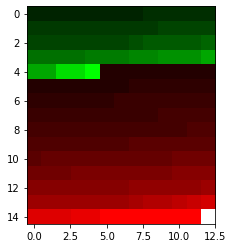

average change: -2.0972 %


 76%|███████▋  | 194/254 [03:14<01:00,  1.00s/it]

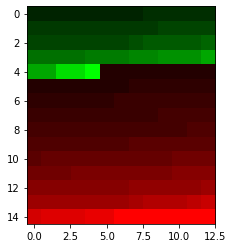

average change: -2.1201999999999996 %


 77%|███████▋  | 195/254 [03:15<00:59,  1.00s/it]

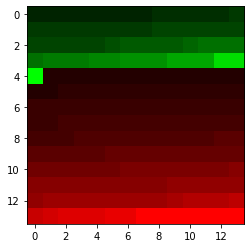

average change: -2.1351 %


 77%|███████▋  | 196/254 [03:16<00:58,  1.00s/it]

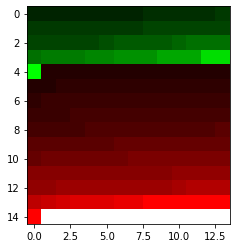

average change: -2.1292 %


 78%|███████▊  | 197/254 [03:17<00:57,  1.00s/it]

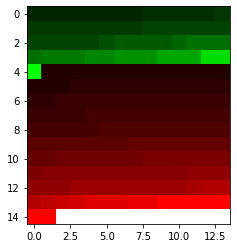

average change: -2.1185 %


 78%|███████▊  | 198/254 [03:18<00:56,  1.00s/it]

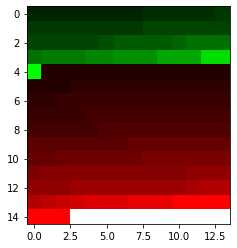

average change: -2.1543 %


 78%|███████▊  | 199/254 [03:19<00:55,  1.00s/it]

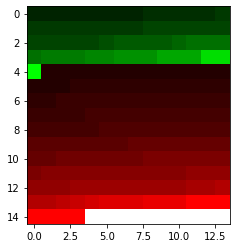

average change: -2.1752000000000002 %


 79%|███████▊  | 200/254 [03:20<00:54,  1.00s/it]

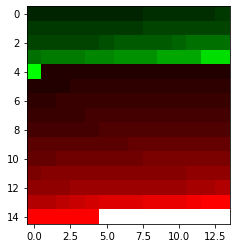

average change: -2.2131000000000003 %


 79%|███████▉  | 201/254 [03:21<00:53,  1.00s/it]

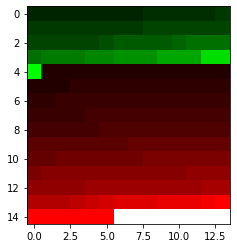

average change: -2.2287 %


 80%|███████▉  | 202/254 [03:22<00:52,  1.00s/it]

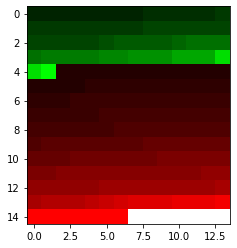

average change: -2.1974 %


 80%|███████▉  | 203/254 [03:23<00:51,  1.00s/it]

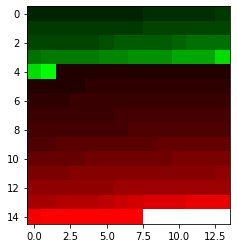

average change: -2.1938 %


 80%|████████  | 204/254 [03:24<00:50,  1.00s/it]

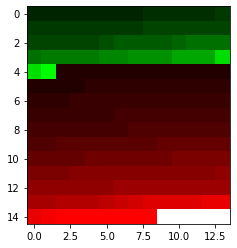

average change: -2.2259 %


 81%|████████  | 205/254 [03:25<00:49,  1.00s/it]

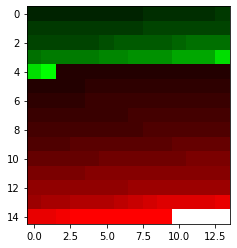

average change: -2.2183 %


 81%|████████  | 206/254 [03:26<00:48,  1.00s/it]

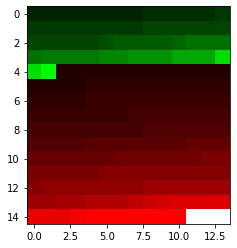

average change: -2.2180999999999997 %


 81%|████████▏ | 207/254 [03:27<00:47,  1.00s/it]

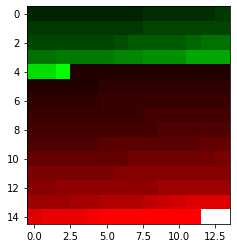

average change: -2.198 %


 82%|████████▏ | 208/254 [03:28<00:46,  1.00s/it]

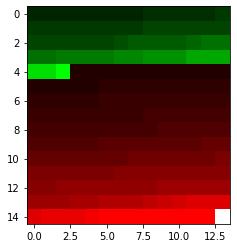

average change: -2.2753 %


 82%|████████▏ | 209/254 [03:29<00:45,  1.00s/it]

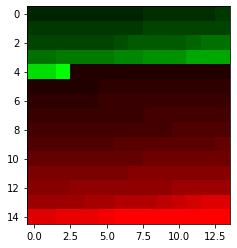

average change: -2.273 %


 83%|████████▎ | 210/254 [03:30<00:44,  1.00s/it]

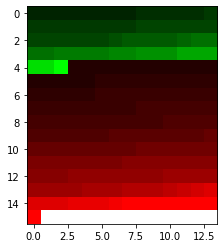

average change: -2.2912 %


 83%|████████▎ | 211/254 [03:31<00:43,  1.00s/it]

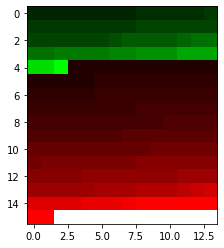

average change: -2.2917 %


 83%|████████▎ | 212/254 [03:32<00:42,  1.00s/it]

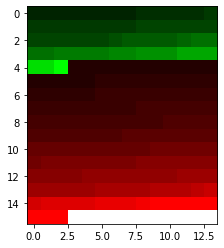

average change: -2.3092 %


 84%|████████▍ | 213/254 [03:33<00:41,  1.00s/it]

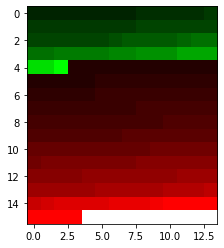

average change: -2.3279 %


 84%|████████▍ | 214/254 [03:34<00:40,  1.00s/it]

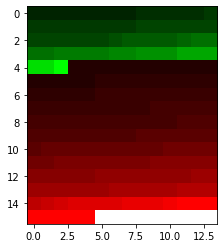

average change: -2.3232 %


 85%|████████▍ | 215/254 [03:35<00:39,  1.00s/it]

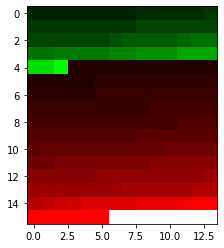

average change: -2.3376 %


 85%|████████▌ | 216/254 [03:36<00:38,  1.00s/it]

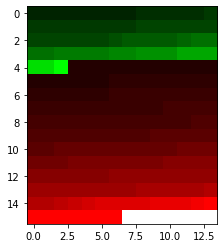

average change: -2.327 %


 85%|████████▌ | 217/254 [03:37<00:37,  1.00s/it]

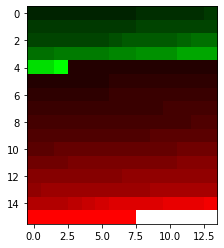

average change: -2.3354 %


 86%|████████▌ | 218/254 [03:38<00:36,  1.00s/it]

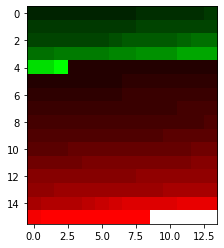

average change: -2.3248 %


 86%|████████▌ | 219/254 [03:39<00:35,  1.00s/it]

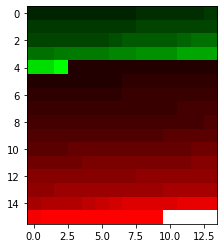

average change: -2.3601 %


 87%|████████▋ | 220/254 [03:40<00:34,  1.00s/it]

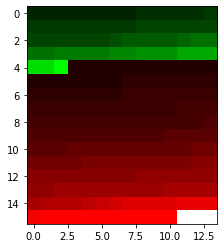

average change: -2.4126000000000003 %


 87%|████████▋ | 221/254 [03:41<00:33,  1.00s/it]

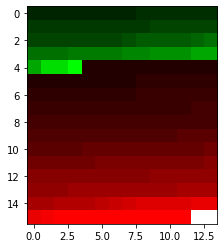

average change: -2.3991 %


 87%|████████▋ | 222/254 [03:42<00:32,  1.00s/it]

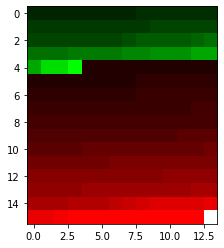

average change: -2.4058 %


 88%|████████▊ | 223/254 [03:43<00:31,  1.00s/it]

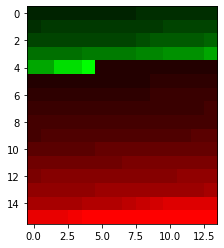

average change: -2.3907000000000003 %


 88%|████████▊ | 224/254 [03:44<00:30,  1.00s/it]

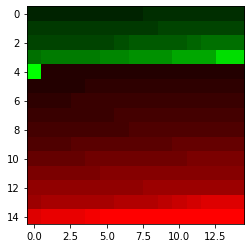

average change: -2.3983999999999996 %


 89%|████████▊ | 225/254 [03:45<00:29,  1.00s/it]

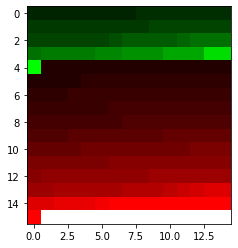

average change: -2.4038 %


 89%|████████▉ | 226/254 [03:46<00:28,  1.00s/it]

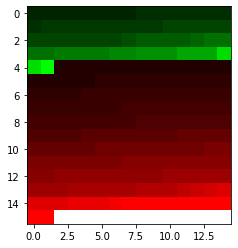

average change: -2.3907000000000003 %


 89%|████████▉ | 227/254 [03:47<00:27,  1.00s/it]

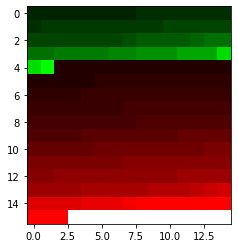

average change: -2.4022 %


 90%|████████▉ | 228/254 [03:48<00:26,  1.00s/it]

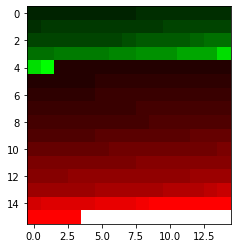

average change: -2.3948 %


 90%|█████████ | 229/254 [03:49<00:25,  1.00s/it]

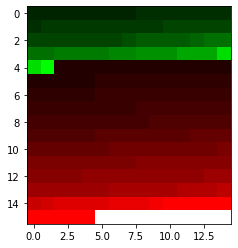

average change: -2.4059 %


 91%|█████████ | 230/254 [03:50<00:24,  1.00s/it]

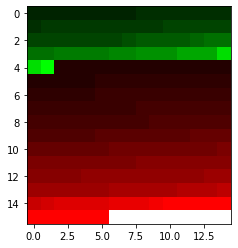

average change: -2.4529 %


 91%|█████████ | 231/254 [03:51<00:23,  1.00s/it]

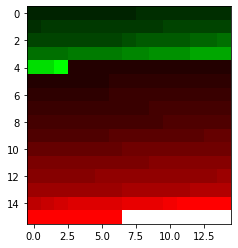

average change: -2.4291 %


 91%|█████████▏| 232/254 [03:52<00:22,  1.00s/it]

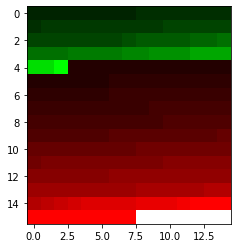

average change: -2.4309000000000003 %


 92%|█████████▏| 233/254 [03:53<00:21,  1.00s/it]

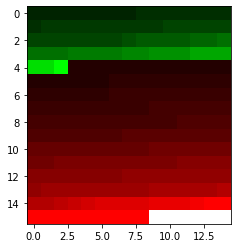

average change: -2.4277 %


 92%|█████████▏| 234/254 [03:54<00:20,  1.00s/it]

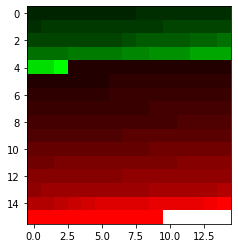

average change: -2.4566999999999997 %


 93%|█████████▎| 235/254 [03:55<00:19,  1.00s/it]

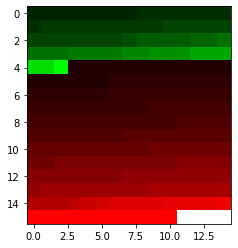

average change: -2.4737999999999998 %


 93%|█████████▎| 236/254 [03:56<00:18,  1.00s/it]

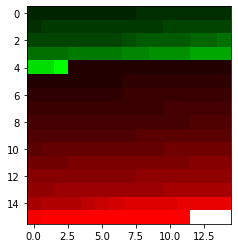

average change: -2.4649 %


 93%|█████████▎| 237/254 [03:57<00:17,  1.00s/it]

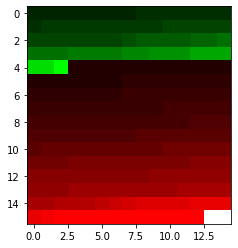

average change: -2.4735 %


 94%|█████████▎| 238/254 [03:58<00:16,  1.00s/it]

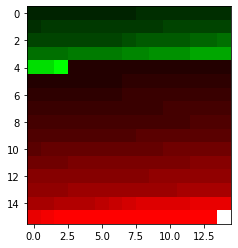

average change: -2.5218000000000003 %


 94%|█████████▍| 239/254 [03:59<00:15,  1.00s/it]

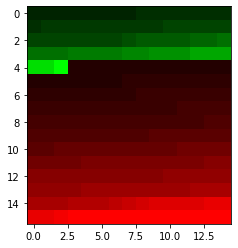

average change: -2.5149 %


 94%|█████████▍| 240/254 [04:00<00:14,  1.00s/it]

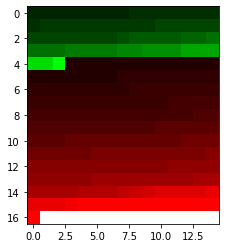

average change: -2.5138000000000003 %


 95%|█████████▍| 241/254 [04:01<00:13,  1.00s/it]

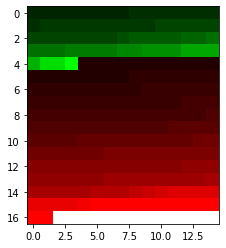

average change: -2.4756 %


 95%|█████████▌| 242/254 [04:02<00:12,  1.00s/it]

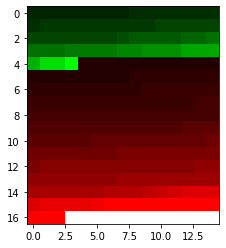

average change: -2.4713 %


 96%|█████████▌| 243/254 [04:03<00:11,  1.00s/it]

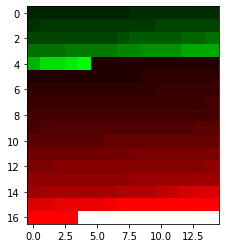

average change: -2.4223000000000003 %


 96%|█████████▌| 244/254 [04:04<00:10,  1.00s/it]

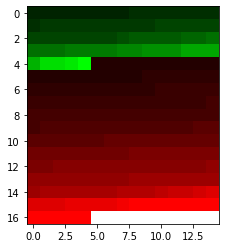

average change: -2.4444 %


 96%|█████████▋| 245/254 [04:05<00:09,  1.00s/it]

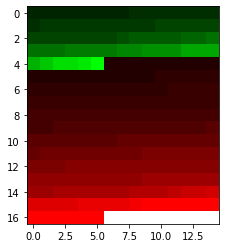

average change: -2.4036999999999997 %


 97%|█████████▋| 246/254 [04:06<00:08,  1.00s/it]

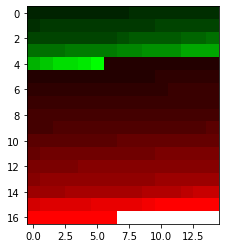

average change: -2.4087 %


 97%|█████████▋| 247/254 [04:07<00:07,  1.00s/it]

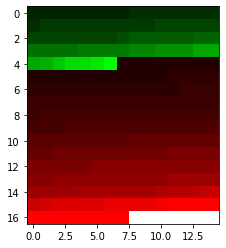

average change: -2.3885 %


 98%|█████████▊| 248/254 [04:08<00:06,  1.00s/it]

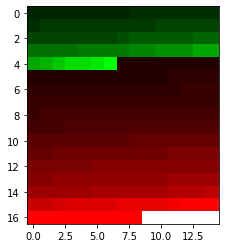

average change: -2.4018 %


 98%|█████████▊| 249/254 [04:09<00:05,  1.00s/it]

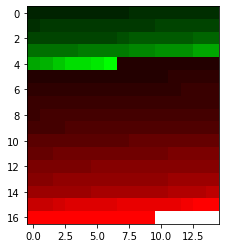

average change: -2.4302 %


 98%|█████████▊| 250/254 [04:10<00:04,  1.00s/it]

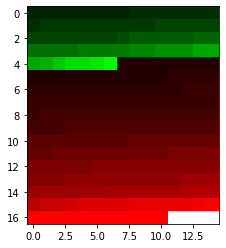

average change: -2.44 %


 99%|█████████▉| 251/254 [04:11<00:03,  1.00s/it]

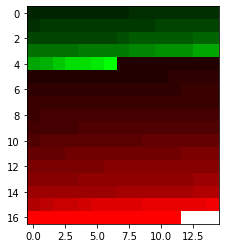

average change: -2.4365 %


 99%|█████████▉| 252/254 [04:12<00:02,  1.00s/it]

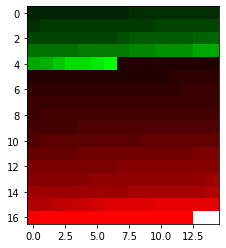

average change: -2.4389000000000003 %


100%|█████████▉| 253/254 [04:13<00:01,  1.00s/it]

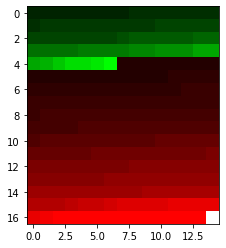

average change: -2.4396 %


100%|██████████| 254/254 [04:14<00:00,  1.00s/it]


In [ ]:
change_df = update_stock_df()

In [ ]:
print(change_df.sort_values(by=["change"]))


    stock    change
107  PETZ -0.818627
178   ONE -0.330690
208  EEIQ -0.183673
186  AACG -0.170455
238  PHCF -0.140000
220  SECO -0.139675
230  UTME -0.132576
63    ZME -0.125581
147   CGA -0.111111
83   JWEL -0.104082
135  FTFT -0.103448
219  CHNR -0.100943
200   CTK -0.097917
249  AEHL -0.094972
234  HUSN -0.092593
198   XIN -0.092500
187   BON -0.091811
179    QH -0.091651
204  IFBD -0.087719
124  EBON -0.087282
184  RCON -0.086614
150    BQ -0.085876
93   HUDI -0.082692
165   GLG -0.079444
244  SNTG -0.078332
14   TCOM -0.071543
90    SOL -0.067504
194  MOGU -0.065753
66   HOLI -0.065427
235  HAPP -0.064706
149    IH -0.063758
199  PBTS -0.063362
213   NEW -0.063143
210   DUO -0.061022
212   SDH -0.060086
115  BYSI -0.059603
19     BZ -0.059588
131  LITB -0.058824
18   HTHT -0.058744
126  CBAT -0.057554
248  TIRX -0.056962
8      LI -0.056203
121   JFU -0.056075
84     LX -0.055249
215  FFHL -0.054404
201  TANH -0.053721
6    XPEV -0.053718
190  LGHL -0.052632
95   PUYI -0.051873
